In [1]:
# Include the Library Of SQL Lite and The Errors of SQLlite 3 (To Make the Debug More Flexible)
import sqlite3    
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sqlite3 import Error 

In [2]:
# PART ONE: Data Wrangling 
# First We Will Make the Connection to The Data Base Using the SQLLite 3 in python 
lahman_con = sqlite3.connect("lahman2014.sqlite")  
# Define the Query We Will Use in the  Task  

# Query is Neasted #####################
####################################################
# The First Qeury -> total_payroll (New Table)
# the query -> Group By (Team Id and Year ID ) This Beacuse Of Each Team Group By Each Team the Salary Which is 
# total_payroll variable 

# For Each Player : Note That 
# all the players who played on a specific team and on a specific year and summing their individual salaries 
# to get a total payroll 

# the Second Qeury 
# we Select Some of the Columns we will Use in the Analysis which are :->  
#  lgID (league), teamID, yearID, payroll, franchID, rank, W (games Won), G (Games played), and win_percentage
# Calculate the Win Precentage as new varaible using -> (Win Games / Total Games) * 100
# Multiply the win games by 1.0 for casting to double  


query = "with total_payroll as (SELECT teamID, yearID, sum(salary) as payroll FROM Salaries GROUP BY teamID, yearID) SELECT Teams.teamID, Teams.yearID, Teams.lgID, payroll, franchID, rank, W,G, ((W*1.0/G)*100) as win_percentage FROM total_payroll, Teams WHERE total_payroll.yearID = Teams.yearID and total_payroll.teamID = Teams.teamID"

########################################### ABOUT MISSING DATA################################################33
# For the Missing Data Note That : 
# the inner join between Two Tables (Teams and the new one Total_payroll) with  (The Same Year and Team ID) and thterfore the team must have 
# At least one Player with salary Information Exists any other Missing in all Infromation about the whole Team 
# Is Ignored 
#################################################################################################################################
# Make the Cursor For Excuting the query 
cur = lahman_con.cursor()
# Excute the Query 
cur.execute(query)
# Get the Out Put (Feach the out Put (List Of Tuples))
rows = cur.fetchall() 
# Loop On each Row (Tuble in the out put and print it q) 
print("teamID yearID  lgID  payroll franchID  Rank  W   G  win_percentage")
for r in rows:
    print(r, "\n") 
lahman_con.close()

teamID yearID  lgID  payroll franchID  Rank  W   G  win_percentage
('ATL', 1985, 'NL', 14807000.0, 'ATL', 5, 66, 162, 40.74074074074074) 

('BAL', 1985, 'AL', 11560712.0, 'BAL', 4, 83, 161, 51.5527950310559) 

('BOS', 1985, 'AL', 10897560.0, 'BOS', 5, 81, 163, 49.693251533742334) 

('CAL', 1985, 'AL', 14427894.0, 'ANA', 2, 90, 162, 55.55555555555556) 

('CHA', 1985, 'AL', 9846178.0, 'CHW', 3, 85, 163, 52.14723926380368) 

('CHN', 1985, 'NL', 12702917.0, 'CHC', 4, 77, 162, 47.53086419753087) 

('CIN', 1985, 'NL', 8359917.0, 'CIN', 2, 89, 162, 54.93827160493827) 

('CLE', 1985, 'AL', 6551666.0, 'CLE', 7, 60, 162, 37.03703703703704) 

('DET', 1985, 'AL', 10348143.0, 'DET', 3, 84, 161, 52.17391304347826) 

('HOU', 1985, 'NL', 9993051.0, 'HOU', 3, 83, 162, 51.23456790123457) 

('KCA', 1985, 'AL', 9321179.0, 'KCR', 1, 91, 162, 56.17283950617284) 

('LAN', 1985, 'NL', 10967917.0, 'LAD', 1, 95, 162, 58.64197530864198) 

('MIN', 1985, 'AL', 5764821.0, 'MIN', 4, 77, 162, 47.53086419753087) 

('M

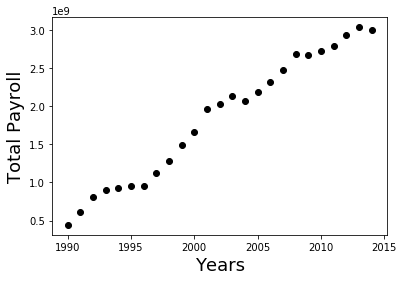

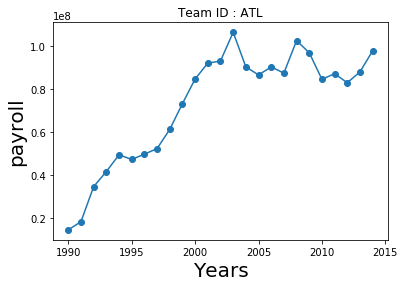

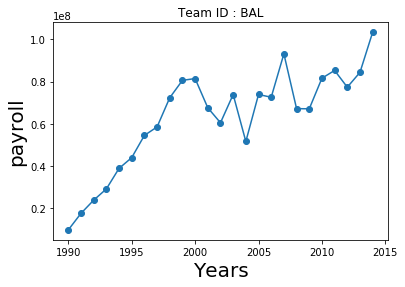

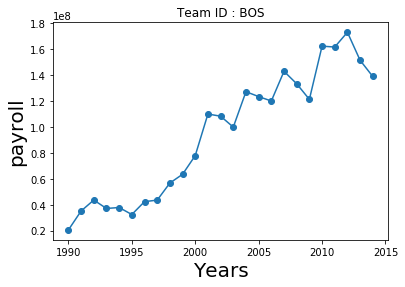

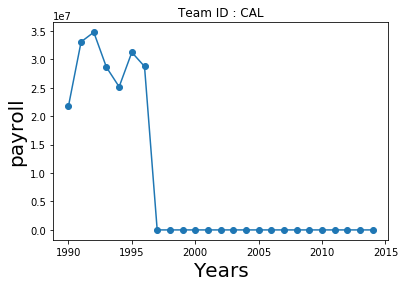

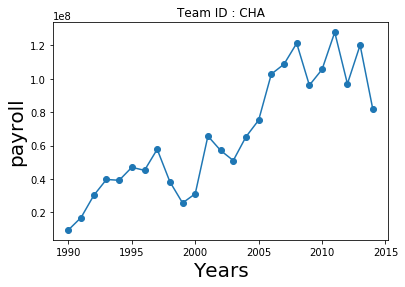

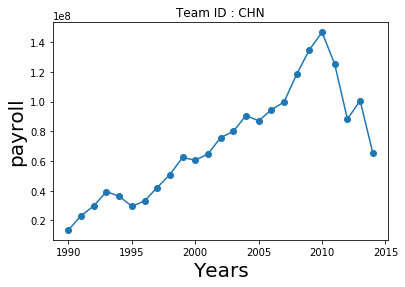

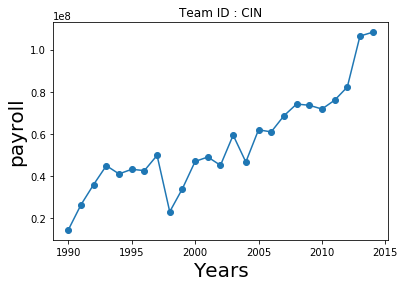

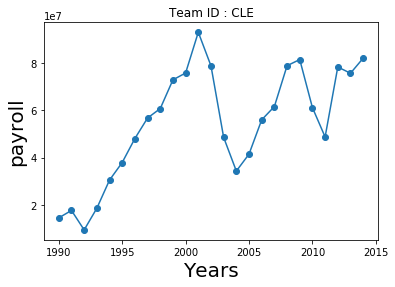

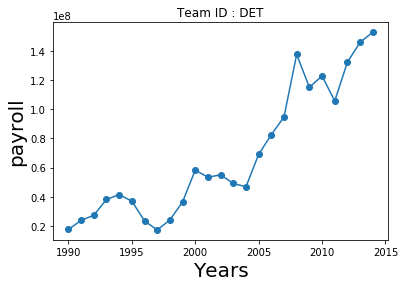

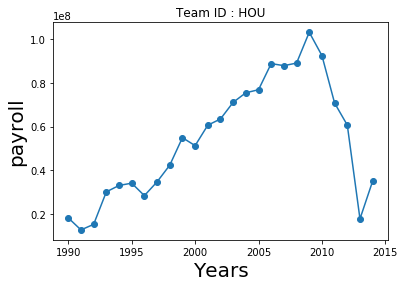

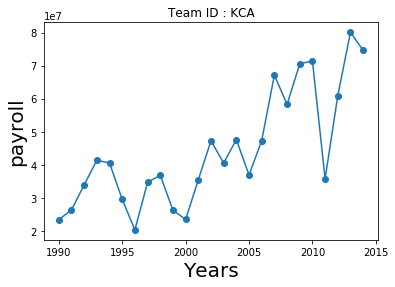

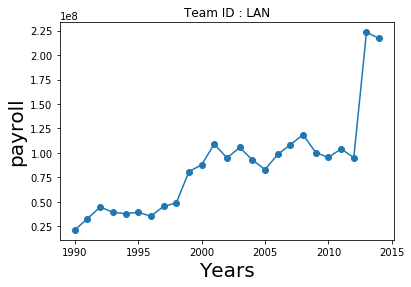

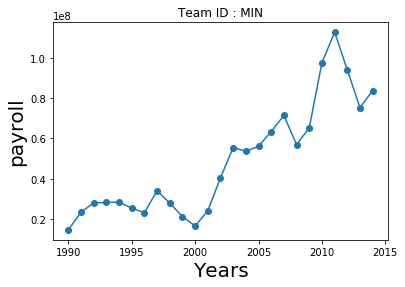

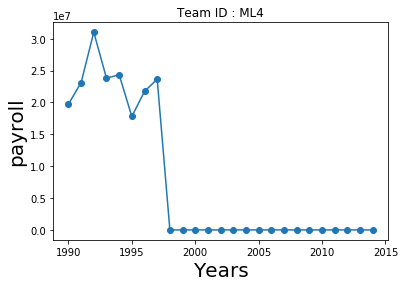

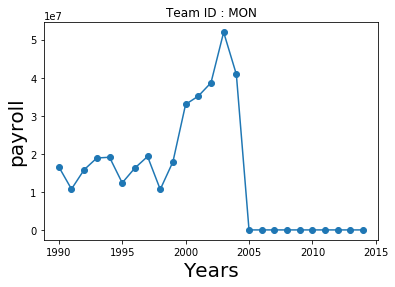

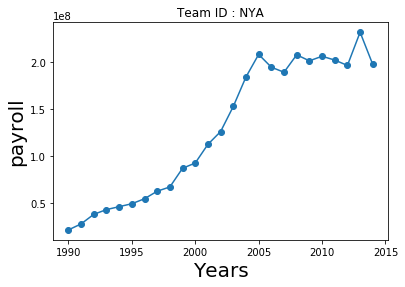

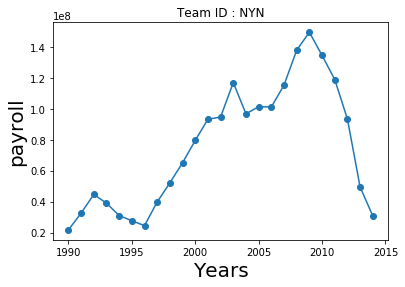

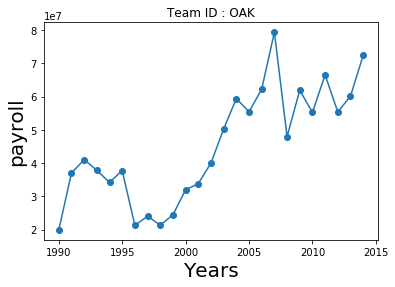

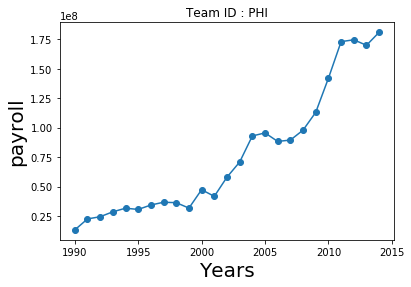

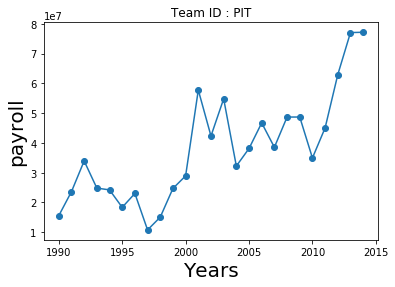

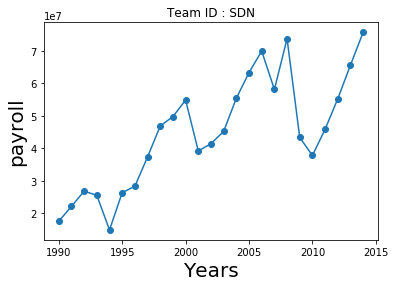

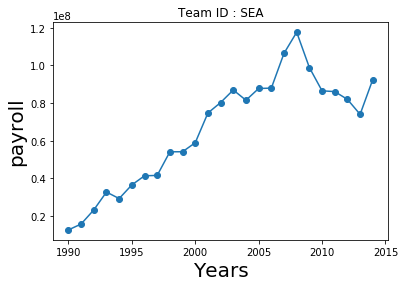

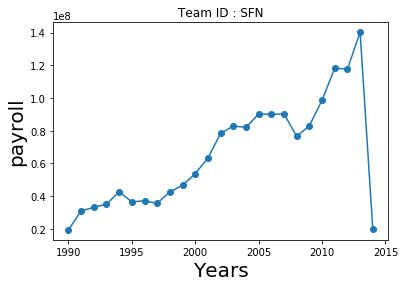

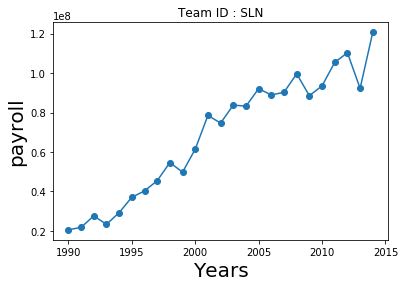

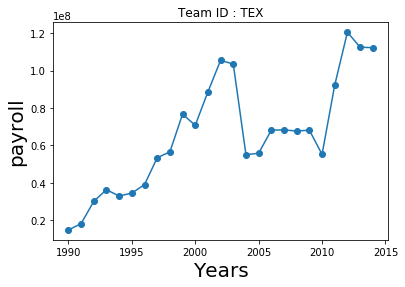

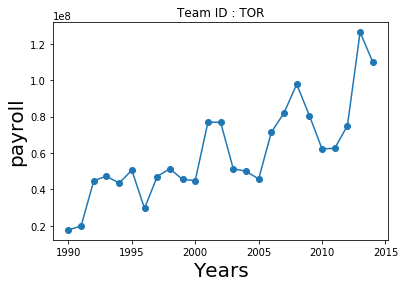

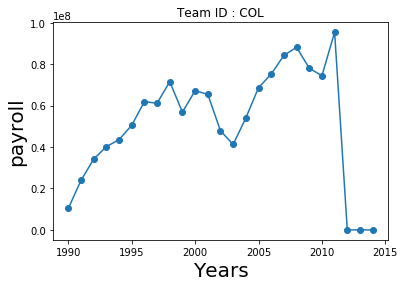

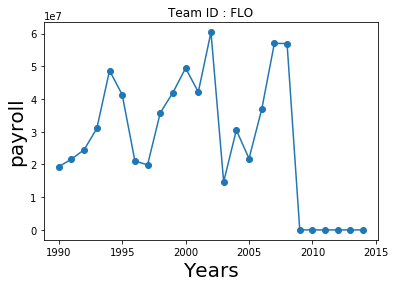

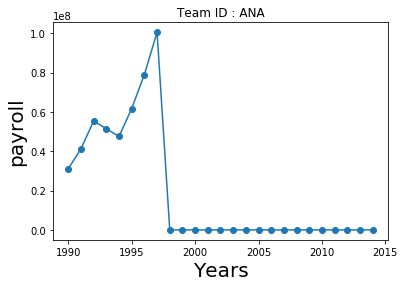

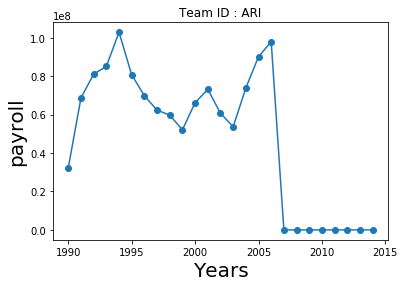

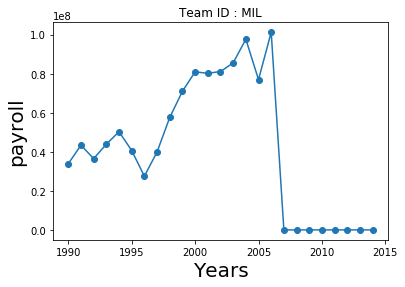

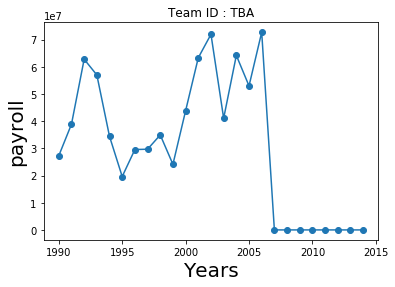

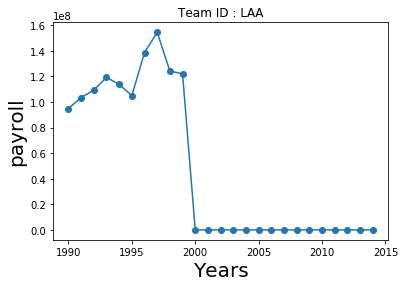

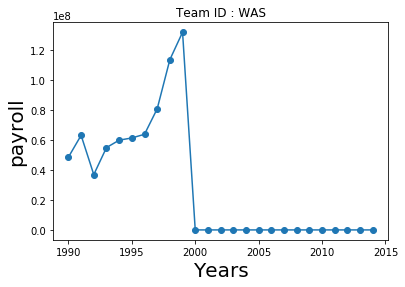

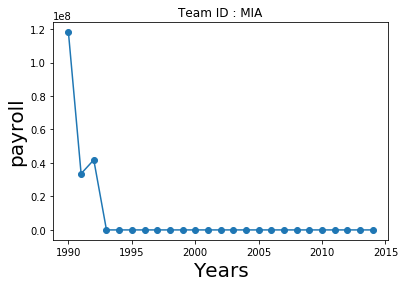

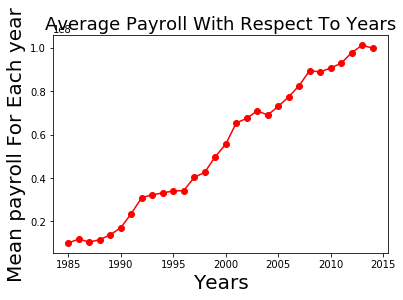

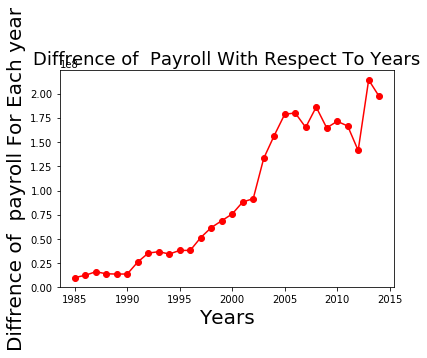

In [3]:
def make_payroll_complete(arr):
    for i in range(len(arr), (2014 - 1990 + 1)):
        arr = np.append(arr, 0)
    return arr
# PART TWO: Exploratory Data Analysis  
# First We Need To Get the Names of Teams (Team ID) with out repetition (Unique For Each One) 

# Payroll distribution 
###################################
teams_id_list = [] 
# Loop on the list of tuples and get the names of the teams 
for data in rows:
    # If the Team Not Exists in the list (Unique one)
    if data[0] not in teams_id_list:
        teams_id_list.append(data[0])
# print(len(teams_id_list)) 
# We see that The number of teams is 35 Team so we need to plot a figure with 35 Plots inside it 

# First Create Pandas Data Frame From the List of Tuples We get In PART ONE 
sql_frame = pd.DataFrame(rows, columns =["teamID" , "yearID", "lgID" ,  "payroll", 
                                         "franchID",   "Rank"  ,"W" , "G" , "win_percentage"])
# print(sql_frame) 
# Now We Need To Get the chunck Of the Data Frame Where The year Lay out in the Interval of  [1990, 2014]  
plot_frame = sql_frame.loc[(sql_frame["yearID"]>=1990) & (sql_frame["yearID"]<=2014)] 
# print(plot_frame)  


# This Part we want to plot ALL Payrolls For ALL Yeasrs For ALL Teams so we will 
list_total_payroll_years = []
for year_number in np.arange(1990, 2015): 
    # Get the payroll For the Selected Years For all Teams 
    year_frame = plot_frame.loc[(plot_frame["yearID"] == year_number)]
    # Get the Sum of all payrolls in this year 
    total_payroll = sum(year_frame["payroll"]) 
    # Append the Result to the List for plotting 
    list_total_payroll_years.append(total_payroll)
# Now We Want To Plot  the Graph  
plt.scatter(np.arange(1990, 2015), list_total_payroll_years, color="black") 
plt.xlabel("Years", fontsize=18) 
plt.ylabel("Total Payroll", fontsize=18) 
plt.show()
#######################################################################################

# We Want the Years From 1990 to 2014 (in code 2015) 
year_arr = np.arange(1990, 2015)
# Now Loop On each Team 
for team_name in teams_id_list:  
    # Get Slice Of the data Frame For Only This Team  (All Years With All payroll) 
    team_frame = plot_frame.loc[(plot_frame["teamID"] == team_name)]  
    # From Each Data Frame Take the Years And payroll  values  
    payroll_arr = np.array(team_frame["payroll"])   
    # Here There is some Error That My The Information of payroll over Years Is missing so we want to make it to 0  
    # Make This Function Call To Finish the Jop
    payroll_arr = make_payroll_complete(payroll_arr)
    # Now Plot the Graph For Each Team 
    plt.plot(year_arr, payroll_arr, "-o")  
    # Give Each Plot The Name Of the Axis and the Title 
    plt.title("Team ID : " + team_name)
    plt.xlabel("Years", fontsize=20)
    plt.ylabel("payroll", fontsize=20) 
    plt.show()
    print("\n\n")

############################################## Comment On the PLots ##################################### 
# The Data Set Have Information About the Payrools In Descrete Years So it's All vertical Data 
# average payrolls of teams are increasing over time 
# the spread of the payroll of the teams increases among the other teams with respsect to time 
# Some teams become much more wealthier than the others  
# The Central Tendecy Seems To Be COnstant With All Plots  
# (central tendency) of baseball teams in a given year has almost always increased as time goes on. On average, 
# a team payroll is more in an given year than from the year before.
#################################################################################################################### 

#################################################### EVIDEINCE ######################################################
# The Evidnce Form the Last Two Graphs Of
# First One is : Average Payrol and Years 
# Second one is : Diffrence Of Average Payroll and Years 
# Note ALL YEARS 
#################################################################################################################### 

# First Graph X_axis is years and Y_axis is Average Payroll For Each Team 



year_mean_payroll = np.arange(1985, 2015) # To 2014 (End - 1)
# first make List of the Mean Of Each year for all teams  
list_of_means = []
for i in year_mean_payroll:  
    # Get Slice Of the data Frame For Only This year  (All teams With All payroll) 
    year_frame = sql_frame.loc[(sql_frame["yearID"] == i)]   
    # Get Mean Of Payroll and Add It To the list  
    list_of_means.append(year_frame["payroll"].mean())
    
# Now Plot the Graph For Each Team  
plt.plot(year_mean_payroll, np.array(list_of_means),  "-o", color="red")  
# Give Each Plot The Name Of the Axis and the Title 
plt.title("Average Payroll With Respect To Years", fontsize=18)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Mean payroll For Each year", fontsize=20) 
plt.show()
print("\n\n")


# Second Graph ->  (Max - Min) Of Payroll Of Each Year With Respect To Time 

# first make List of the Mean Of Each year for all teams  
list_of_diffrencies = []
for i in year_mean_payroll:  
    # Get Slice Of the data Frame For Only This year  (All teams With All payroll) 
    year_frame = sql_frame.loc[(sql_frame["yearID"] == i)]   
    # Get Max - min (Rich - Poor of Teams) Of Payroll and Add It To the list  
    list_of_diffrencies.append(year_frame["payroll"].max() - year_frame["payroll"].min())
    
# Now Plot the Graph For Each Team  
plt.plot(year_mean_payroll, np.array(list_of_diffrencies),  "-o", color="red")  
# Give Each Plot The Name Of the Axis and the Title 
plt.title("Diffrence of  Payroll With Respect To Years", fontsize=18)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Diffrence of  payroll For Each year", fontsize=20) 
plt.show()
print("\n\n") 
###########The richest teams likely had to pay less to their players because the economy was doing poorly.######

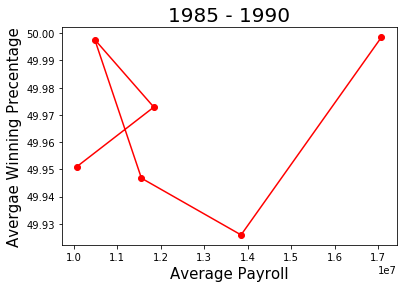

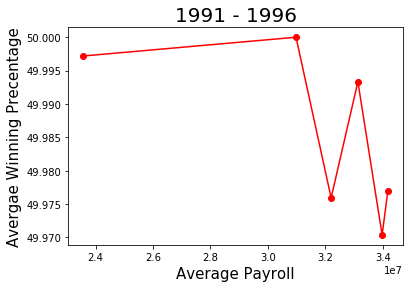

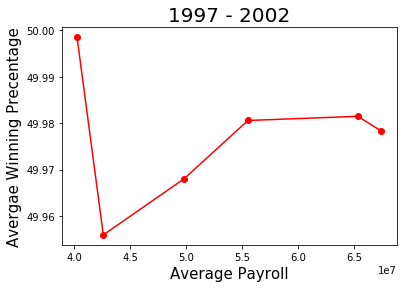

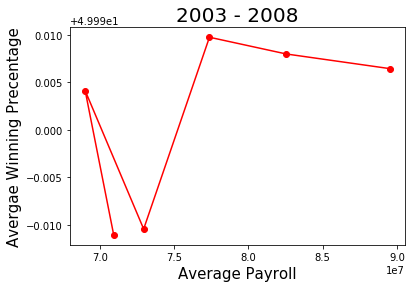

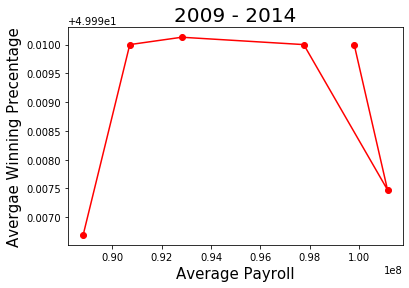

##################################### OKA TEAM ################################################


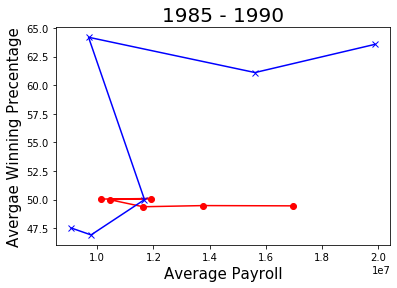

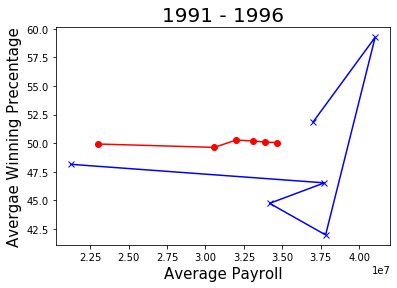

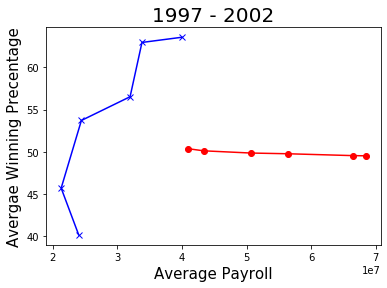

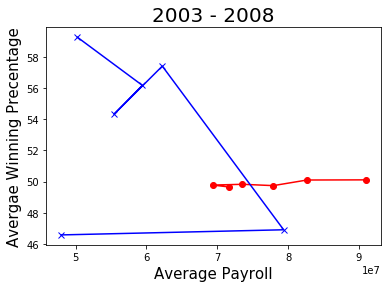

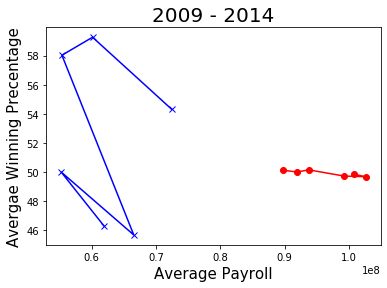

In [5]:
# Correlation between payroll and winning percentag 

# First We need To SPlit the Years To 5 Peroids  (The Total number of Years is 29 Year) 
# so we generate array of 2d (Rows = 5 and Colums = Number of Years In each Interval) 
interval_years = 6 # (2014 - 1985 + 1) / 5 = (6) the Last Year is not included in the interval 
Periods = 5 # The number of periods 
# Make Intiazliation for the 2D Array 
peroids_arr = np.array([])
# loop  to make 2d array 
for year_number in range(1985, 2015): 
    # Add the number of year to the array 
    peroids_arr = np.append(peroids_arr, year_number).astype(int) # As Type Integer 
# Reshape the array to be (Each Interval Has 6 Years From 1985 to 2014)
peroids_arr = peroids_arr.reshape(Periods, interval_years) 
# print(peroids_arr) 
# Now Loop On each Interval  
for interval in peroids_arr: 
    #  make two lists one for the mean of payroll and one for the mean of winning precentage  
    payroll_list = [] 
    winnning_precentage_list = []  
    # loop on each year in the Interval 
    for year in interval: 
        # get Slice of data frame (the Whole Data Frame Sql Frame) with respect to the year 
        year_frame = sql_frame.loc[sql_frame["yearID"] == year] 
        payroll_list.append(year_frame["payroll"].mean())  # Add Payroll Mean 
        winnning_precentage_list.append(year_frame["win_percentage"].mean())  # add winning precentage Mean 
    # Now Plot the Data We Had Collect 
    plt.plot(np.array(payroll_list), np.array(winnning_precentage_list), "-o", color="red")  
    plt.title(str(interval[0]) + " - " + str(interval[len(interval) - 1]), fontsize=20)
    plt.xlabel("Average Payroll", fontsize=15) 
    plt.ylabel("Avergae Winning Precentage", fontsize=15)
    plt.show() 
    
################################################## The Comment #####################################################
#  the spread of the average payroll increases as more teams are paying their players more and years  
# spending more money on players is more likely to result in a team winning more games 
# Yes The More some teams Pays For Players The Moroe the Winning Precentage Increase Result in the Winning More Games 



# FOR OAK TEAM   Repeate the Same Code But Only For This Team Not ALL The Team 
print("##################################### OKA TEAM ################################################")  

################################################### Commnet ##########################################
# A's spending efficiency across these periods for oka tem comparing to the other team unitll 2014 is better than 
# the other team which get them the efficiecny to be Most likely in the Winning Precentage And better than 
# the other teams 
# How Ever My Be After This be Less than That  
###################################################################################################################
for interval in peroids_arr: 
    #  make two lists one for the mean of payroll and one for the mean of winning precentage  
    payroll_list = [] 
    winnning_precentage_list = []   
    # Make Two Lists For the OAK Team 
    oak_payroll = [] 
    oak_winning_precentage = []
    # loop on each year in the Interval 
    for year in interval: 
        # get Slice of data frame (the Whole Data Frame Sql Frame) with respect to the year all ExCept the OAK 
        year_frame = sql_frame.loc[(sql_frame["yearID"] == year) & (sql_frame["teamID"] != "OAK")] 
        payroll_list.append(year_frame["payroll"].mean())  # Add Payroll Mean 
        winnning_precentage_list.append(year_frame["win_percentage"].mean())  # add winning precentage Mean  
        ########## FOR OAK ###############  
        oak_frame = sql_frame.loc[(sql_frame["yearID"] == year) & (sql_frame["teamID"] == "OAK")]
        oak_payroll.append(oak_frame["payroll"].mean()) 
        oak_winning_precentage.append(oak_frame["win_percentage"].mean())
    # Now Plot the Data We Had Collect 
    plt.plot(np.array(payroll_list), np.array(winnning_precentage_list), "-o", color="red")   
    plt.plot(np.array(oak_payroll), np.array(oak_winning_precentage), "-x", color="blue")
    plt.title(str(interval[0]) + " - " + str(interval[len(interval) - 1]), fontsize=20)
    plt.xlabel("Average Payroll", fontsize=15) 
    plt.ylabel("Avergae Winning Precentage", fontsize=15)
    plt.show() 

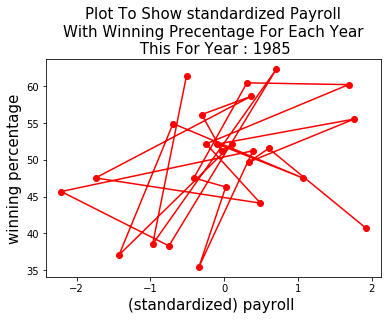

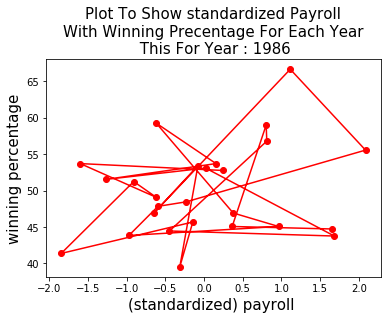

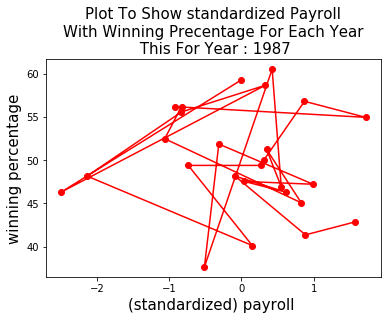

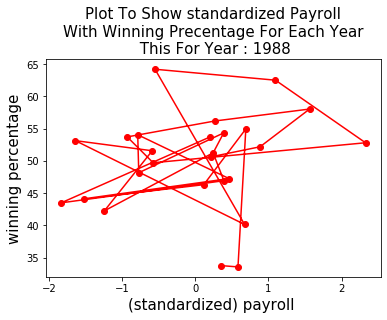

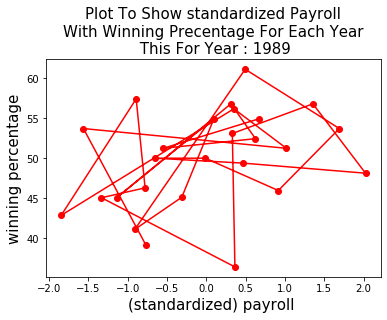

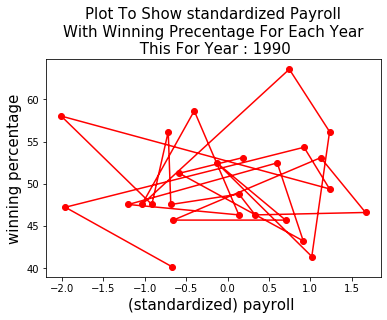

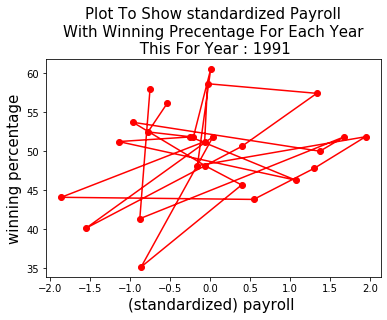

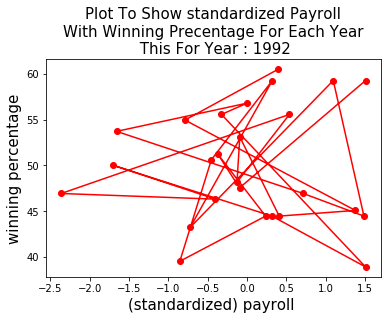

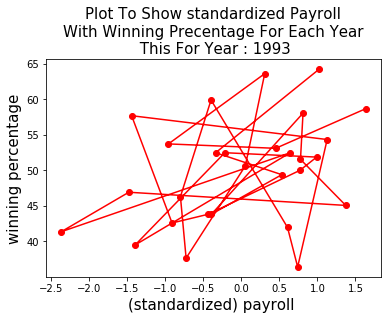

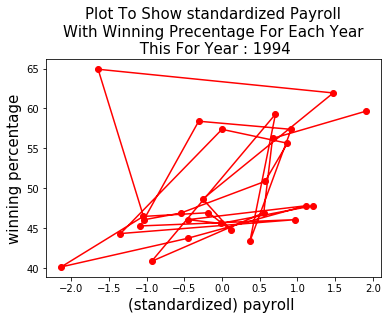

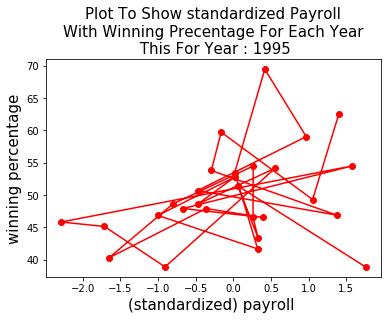

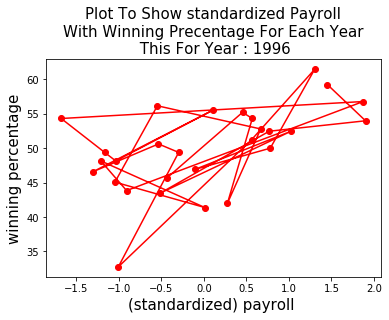

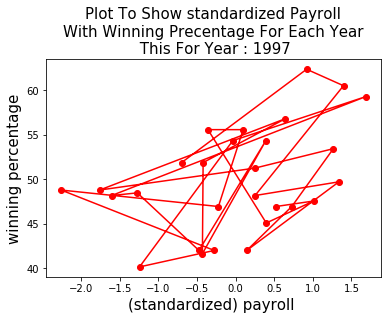

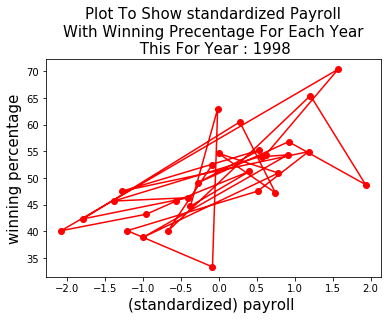

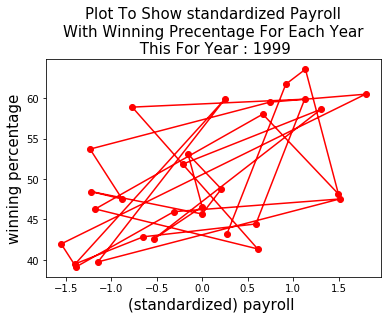

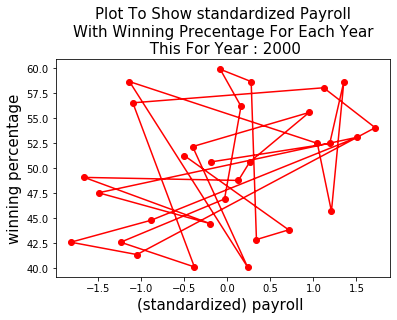

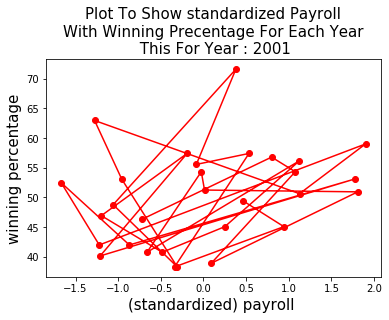

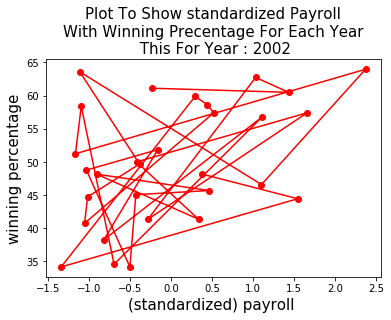

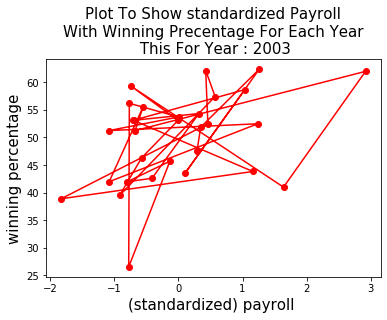

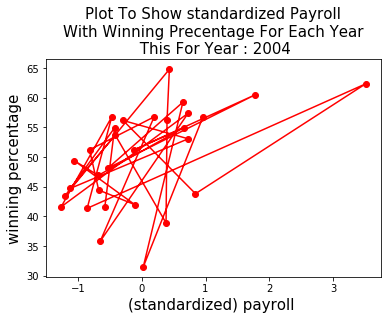

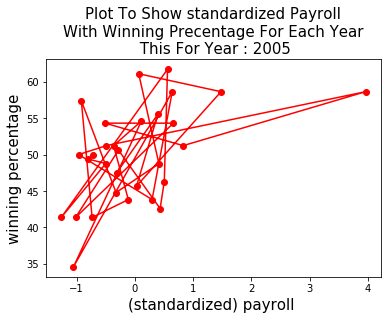

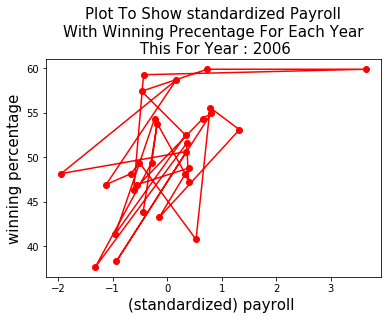

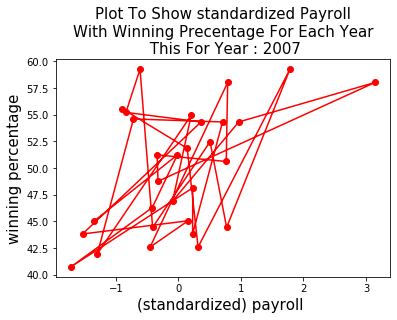

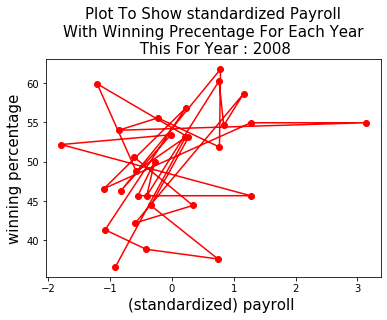

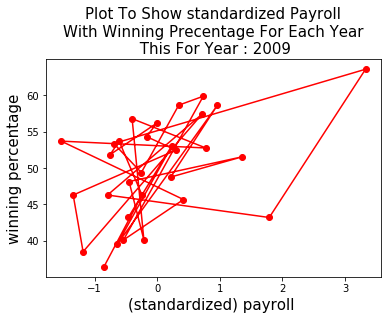

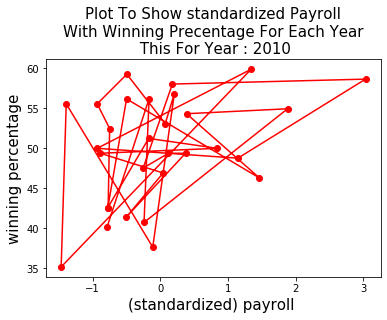

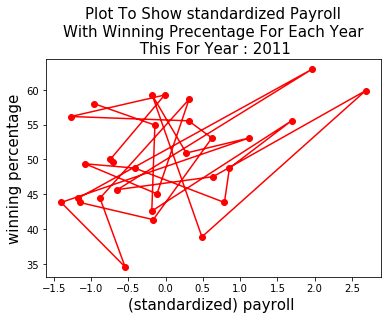

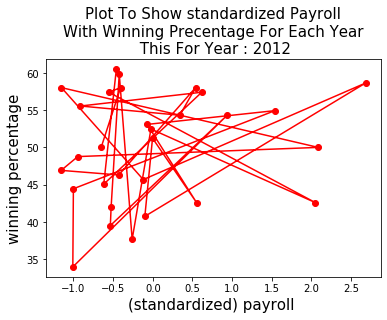

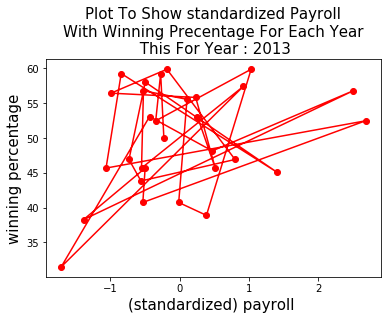

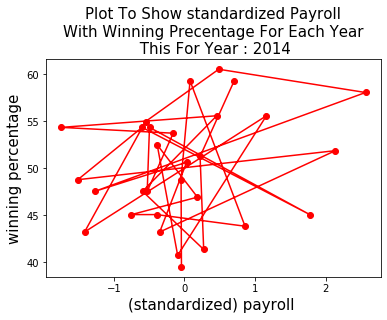

In [6]:
# PART THREE: Data Transformations 
# Standardizing across year 

# First Make A List Containg All Years From 1985 to 2014 
years = np.arange(1985, 2015) 
# loop on the years to apply the equation std_payllor = (payllor - average_paylor) / standad_deviation_of_payllor 
for year_number in years:
    # Take The Frame For This Year Only 
    year_frame = sql_frame.loc[sql_frame["yearID"] == year_number] 
    # For Each Year Get the List Of Payrolls, Mean Of Payrolls 
    # and Standard Deviasion of Payroll
    payllor_array = np.array(year_frame["payroll"]) 
    payllor_year_mean = year_frame["payroll"].mean() 
    payllor_year_standard = year_frame["payroll"].std()  
    # Apply the First Equation 
    standard_payllor = (payllor_array - payllor_year_mean) / payllor_year_standard 
    # Get the Winning Precentage  
    winning_precentage_array = np.array(year_frame["win_percentage"]) 
    # Now Plot the Data  
    plt.plot(standard_payllor, winning_precentage_array, "-o", color="red")  
    plt.title("Plot To Show standardized Payroll\nWith Winning Precentage For Each Year\n This For Year : " + str(year_number),
              fontsize=15)
    plt.xlabel("(standardized) payroll ", fontsize=15)
    plt.ylabel("winning percentage", fontsize=15)
    plt.show() 
################################################# DISCUSSION ####################################################
# The Plots Before Transformation : ->  ALL the teams In the diffrent Ranges of Years 
# Have Diffrent Means (Centres In Each Year) and Diffrent Standard Devission So It's Difficult TO Compare From the Plots 
# Afeter Transformation All Have the Same Normal Scale (Mean 0 and STandard With 1 value) So 
# It Was Easy To Compare Them  
############################################### DISCUSSION #####################################################

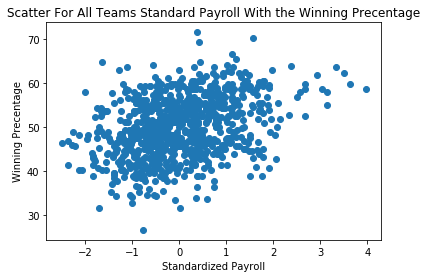

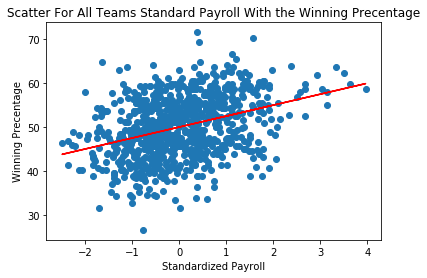

In [7]:
# Expected wins  
# Make Total Listst First 
total_standard_paylor = np.array([]) 
total_winning = np.array([])
# First We need To Make Scatter For ALL Standarized Payroll with all Years And the Winning Precentage Data 
for year_number in years:
    # Take The Frame For This Year Only 
    year_frame = sql_frame.loc[sql_frame["yearID"] == year_number] 
    # For Each Year Get the List Of Payrolls, Mean Of Payrolls 
    # and Standard Deviasion of Payroll
    payllor_array = np.array(year_frame["payroll"]) 
    payllor_year_mean = year_frame["payroll"].mean() 
    payllor_year_standard = year_frame["payroll"].std()  
    # Apply the First Equation 
    standard_payllor = (payllor_array - payllor_year_mean) / payllor_year_standard 
    # Get the Winning Precentage  
    winning_precentage_array = np.array(year_frame["win_percentage"]) 
    # Append Data To the Total Lsitst To Scatter Later  
    total_standard_paylor = np.append(total_standard_paylor, standard_payllor)
    total_winning = np.append(total_winning, winning_precentage_array)

plt.scatter(np.array(total_standard_paylor), np.array(total_winning)) 
plt.title("Scatter For All Teams Standard Payroll With the Winning Precentage") 
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Precentage")
plt.show()  

# Calculate epected Out Put Using the Equation 
expected_out_put = total_standard_paylor * 2.5 + 50 
plt.scatter(np.array(total_standard_paylor), np.array(total_winning)) 
plt.plot(total_standard_paylor, expected_out_put, color="red")
plt.title("Scatter For All Teams Standard Payroll With the Winning Precentage") 
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Precentage")
plt.show()  
################################################ COnclusion ########################################################## 
# \team where to spend the average amount of payroll relative to the 
# other teams in the league, they would likely  win about 50% of their games.

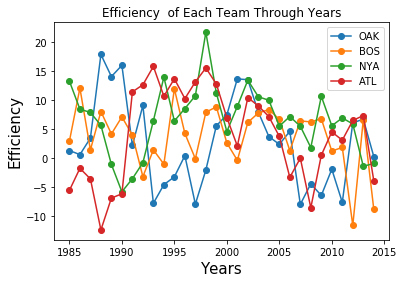

In [8]:
# Spending efficiency 

# we will use the previouse  expected_out_put For This Calculations as  the efficiency = actual - expected 
# Using the Winning Precentage 
Efficieny = total_winning - expected_out_put 
# Now Scatter The Efficiency Of Each Team Over the Years From 1985 to 2014 
# first We Will Choose Some Teams To Plot let's Say -> OAK , BOS, NYA and ATL   
for team_name in ["OAK", "BOS", "NYA", "ATL"]:
    # first get Team Frame 
    team_frame = sql_frame.loc[sql_frame["teamID"] == team_name] 
    payllor_array = np.array(team_frame["payroll"]) 
    payllor_year_mean = team_frame["payroll"].mean() 
    payllor_year_standard = team_frame["payroll"].std()  
    # Apply the First Equation 
    standard_payllor = (payllor_array - payllor_year_mean) / payllor_year_standard 
    # Get the expected Winning Precentage  
    expected_winning = standard_payllor * 2.5 + 50 
    # get Winning Precentage 
    winning_precentage_array = np.array(team_frame["win_percentage"])  
    efficiency = winning_precentage_array - expected_winning 
    # This to avoid Error If there Is Missing in the Data 
    for i in range(len(efficiency), 2014 - 1985 + 1): 
        efficiency = np.append(efficiency, 0) 
    # using the Same Array -> Years To plot the data  
    plt.plot(years, efficiency, "-o", label=team_name) 
plt.legend() 
plt.xlabel("Years", fontsize=15) 
plt.ylabel("Efficiency", fontsize=15) 
plt.title("Efficiency  of Each Team Through Years") 
plt.show() 

############################################### the Answer Of the Qeustion ########################################## 
#From this set of plots we can learn why the Oakland A’s were a 
#truely smart team and ahead of their time. As we can see from the 
#first graph ploted above ), “winning efficienct of teams over time seemed to 
#increase to an all time high in and then plateaued . 
#that over time, money seemed to have a high level of influence on how well a team would do. 
# In particular, as time went by, the regression line of payroll and winning percentage of 
# teams emmerged and we came to the conclusion in our regression line of all teams across all years 
#  that a team is predicted to win more than half of their games if they 
# spend more than average amount of payroll for their teams. Oakland is considered an 
# interesting team because they are an outlier to this trend. At least in their money ball period, 
# if we look at the time period from , we see that Oakland became more efficient 
# than any other team (. This means that they 
# were able to outperform in their games won (winning percentage) based off of their team payrolls.
#Based off of what they were paying, they were winning way more games than expected.